## Simulating Stock Prices

By following this notebook, you'll be able to build your own stock price simulator in Python.

You'll learn about:


1.   Geometric Brownian Motion
2.   Import Libraries and Set-up
3.   Build the functions
4.   Visualize the Results



Let's Dive into it!!



### Geometric Brownian Motion 
It is a continuous-time stochastic process where the log of the random variable follows the **Wiener process** with drift.

It's the data series that trends up or down through time with a defined level of volatility. 

And its perfect for simulating stock prices.






##### Wiener Process

A Wiener process is a one-dimensional Brownain Motion. It's used in quant-finance because of some useful mathematical properties.

It's used interchangeably with GBM.


Read more on [Wikipedia](https://t.co/8Pj2x3pJDB)



In [1]:
# importing the librares
""" 
Since we are only simulating the stock prices
we do not need to download any data, all we need
is numpy for the math and matplotlib for the plots
"""

import numpy as np
import matplotlib.pyplot as plt


To simulate the stock proces, we need to set some input parameters.

We start with: 


1.   $\sigma$ the percentage volatility
2.   $s_0$ is the initial stock price
3.   $\mu$ is the trend



In [2]:
"""
This setup will simulate 1,000 paths with daily
time steps over 5 years
"""

# setup parameters
s0 = 131.00
sigma = 0.25
mu = 0.35

# setup the simulation
paths = 1000
delta = 1.0/252.0
time = 252 * 5

The first function returns a Wiener process.
We'll end up with a $2$-dimensional Numpy array with $1,260$ rows and $1,000$ columns.

Each row is a day and each column is a simulation path.

In [4]:
def wiener_process(delta, sigma, time, paths):
  """Returns a Wiener Process

  Parameters
  ---------------------------------
  delta : float
        The increment to downsample sigma
  sigma : float
        Percentage volatality
  time : int
        Number of samples to create
  paths : int
        Number of price simulations to create

  Returns
  ---------------------------------
  wiener_process : np.array

  Notes
  -------------------------------
  This method returns a wiener process, the 
  wiener process is also called Brownian motion.
  For more information: Check the link given above
  """
  # returns an array of samples from a normal distribution
  return sigma * np.random.normal(loc=0, scale=np.sqrt(delta),size = (time,paths))

In [5]:
# a function that creates the GBM returns

def gbm_returns(delta, sigma, time, mu,paths):
  """ Returns return from a Geometric brownian motion

  Parameters
  ---------------------------------
  delta : float
        The increment to downsample sigma
  sigma : float
        Percentage volatality
  time : int
        Number of samples to create
  mu : float
        Percentage drift
  paths : int
        Number of price simulations to create

  Returns
  --------------------------------------
  gbm_returns : np.ndarray

  Notes
  -------------------------------------
  This method constructs random geometric brownian motion
  """

  process = wiener_process(delta, sigma, time, paths)
  return np.exp(process + (mu - sigma**2 / 2) * delta)
  

And lastly we can build the price paths.

Prepend a row of 1s to the returns array and multiply the starting stock price by the cumulative product of the GBM returns


In [6]:
def gbm_levels(s0, delta, sigma, time, mu, paths):
  """ Returns price paths starting at s0

  Parameters
  ---------------------------------
  s0    : float
        The starting stock price
  delta : float
        The increment to downsample sigma
  sigma : float
        Percentage volatality
  time : int
        Number of samples to create
  mu : float
        Percentage drift
  paths : int
        Number of price simulations to create

  Returns
  --------------------------------------
  gbm_levels : np.ndarray

  
  """

  returns = gbm_returns(delta, sigma, time, mu, paths)

  stacked = np.vstack([np.ones(paths), returns])

  return s0 * stacked.cumprod(axis=0)


Read the [Ultimate Guid to Pricing Options and Implied Volatality](https://t.co/uUXgYrCY65) with python where GBM is used.



*   Block-Scholes , the greeks, and implied volatality
*   Live Options data



We here will look at $2$ examples.

The first simulates $1000$ price paths over $5$ years.

It starts at a price of $131$ with $25\%$ volatality and $35\%$ returns

This is exactly the case of Apple in 2021

A $35\%$ drift causes most price paths to increase from the intial price

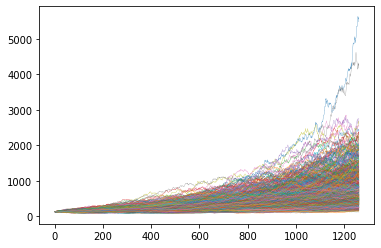

In [7]:
price_paths = gbm_levels(s0, delta, sigma, time, mu,paths)
plt.plot(price_paths, linewidth = 0.25)
plt.show()

In the second example, set the drift to $0.0$ 
Only about half the prices end up higher than the original price.

Since the source of randomness is a variable from a normal distribution, it makes sense that half the values lie in either side of the mean.

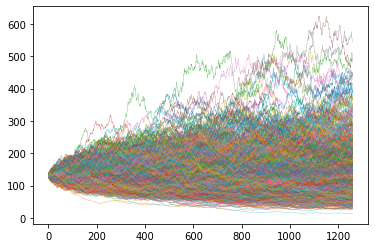

In [8]:
price_paths = gbm_levels(s0, delta, sigma , time, 0.0, paths)
plt.plot(price_paths, linewidth= 0.25)
plt.show()

Spend some time and play around with the variables.


*   What happens if you double volatility?
*   What happens if you set mu to a negative number?


  

You can use this code to simulate a trading strategy too.

It's a great way to get some intuition about how markets behave.